<a href="https://colab.research.google.com/github/AkobirNarzullaev/ML-models/blob/main/logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression

**Logistic regression** is a regression and a classification model that is used in supervised machine learning.

**How it works?** It applies sigmoid function to linear regression and classifies input based on a threshold(usually it is 0.5). It looks like an S shaped figure.

**Logistic regression formula:**
$$P(y=1∣x)=σ(w^Tx+b)$$

**Sigmoid function:**

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

**Why Logistic Regression is popular?**
* Simple and fast to train
* Interpretable
* Works well when the classes are linearly separable

**Use Cases**
* Medical Diagnosis
* Credit Scoring
* Risk Management



In [34]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

In [35]:
df = pd.read_csv('/content/diabetes_dataset.csv')
df

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,45,Female,Asian,39.4,114.0,76.2,13.4,109,82,...,60.3,88.7,19.1,6.1,Low,3582,NaN,Former,1,1
9996,9996,41,Female,Asian,21.0,71.3,77.1,12.9,154,72,...,72.3,200.0,37.1,3.5,Low,2206,NaN,Never,1,1
9997,9997,50,Female,Asian,29.0,106.3,97.5,4.9,122,61,...,69.8,156.1,85.8,4.9,High,3175,Heavy,Former,1,1
9998,9998,62,Female,White,27.3,119.9,89.0,11.5,99,115,...,74.2,110.9,25.3,5.2,High,3478,Moderate,Never,1,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  object 
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholesterol_LDL                10000 non-null  

In [37]:
df = df.drop(columns="Unnamed: 0")
df

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45,Female,Asian,39.4,114.0,76.2,13.4,109,82,187.7,60.3,88.7,19.1,6.1,Low,3582,NaN,Former,1,1
9996,41,Female,Asian,21.0,71.3,77.1,12.9,154,72,234.3,72.3,200.0,37.1,3.5,Low,2206,NaN,Never,1,1
9997,50,Female,Asian,29.0,106.3,97.5,4.9,122,61,266.0,69.8,156.1,85.8,4.9,High,3175,Heavy,Former,1,1
9998,62,Female,White,27.3,119.9,89.0,11.5,99,115,172.3,74.2,110.9,25.3,5.2,High,3478,Moderate,Never,1,0


In [38]:
# As there is no target column we are going to create one using the threshold of Fasting_Blood_Glucose ≥ 126mg/dL and HbA1c ≥ 6.5
df['Diabetes'] = ((df['Fasting_Blood_Glucose'] >= 126) | (df['HbA1c'] >= 6.5)).astype(int)
df

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,...,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,...,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,1
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,...,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,1
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,...,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,1
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,...,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,1
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,...,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45,Female,Asian,39.4,114.0,76.2,13.4,109,82,187.7,...,88.7,19.1,6.1,Low,3582,NaN,Former,1,1,1
9996,41,Female,Asian,21.0,71.3,77.1,12.9,154,72,234.3,...,200.0,37.1,3.5,Low,2206,NaN,Never,1,1,1
9997,50,Female,Asian,29.0,106.3,97.5,4.9,122,61,266.0,...,156.1,85.8,4.9,High,3175,Heavy,Former,1,1,0
9998,62,Female,White,27.3,119.9,89.0,11.5,99,115,172.3,...,110.9,25.3,5.2,High,3478,Moderate,Never,1,0,1


In [39]:
df['Diabetes'].value_counts()

,count
Diabetes,
1,9047
0,953


In [40]:
df.isna().sum()

,0
Age,0
Sex,0
Ethnicity,0
BMI,0
Waist_Circumference,0
Fasting_Blood_Glucose,0
HbA1c,0
Blood_Pressure_Systolic,0
Blood_Pressure_Diastolic,0
Cholesterol_Total,0


In [41]:
df.Alcohol_Consumption.value_counts()

,count
Alcohol_Consumption,
Moderate,3373
Heavy,3307


In [42]:
## As there are only moderate and heavy consumptions, we can treat NaN values as None meaning they do not drink at all.
df.Alcohol_Consumption.fillna("None", inplace=True)

<ipython-input-42-689e181885f0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Alcohol_Consumption.fillna("None", inplace=True)


In [75]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

ohe_cols = ["Sex", "Ethnicity", "Smoking_Status"]
ode_cols = ["Physical_Activity_Level", "Alcohol_Consumption"]

preprocessor = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(), ohe_cols),
        ("ode", OrdinalEncoder(), ode_cols),
    ],
    remainder = "passthrough"
)

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("smote", SMOTE(sampling_strategy=0.5, random_state=42)),
    ("rus",   RandomUnderSampler(sampling_strategy=1.0, random_state=42)),
    ("model", LogisticRegression(class_weight="balanced", random_state=42))
])

In [76]:
X = df.drop("Diabetes", axis=1)
y = df["Diabetes"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  ['Sex', 'Ethnicity',
                                                   'Smoking_Status']),
                                                 ('ode', OrdinalEncoder(),
                                                  ['Physical_Activity_Level',
                                                   'Alcohol_Consumption'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
                ('rus',
                 RandomUnderSampler(random_state=42, sampling_strategy=1.0)),
                ('model',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [79]:
y_pred = pipe.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score
print("Test accuracy: ", accuracy_score(y_test, y_pred))

Test accuracy:  0.9065


In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 170,   11],
       [ 176, 1643]])

In [82]:
from sklearn.metrics import roc_auc_score

y_prob = pipe.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob)

np.float64(0.9691591822353973)

Text(0, 0.5, 'TPR')

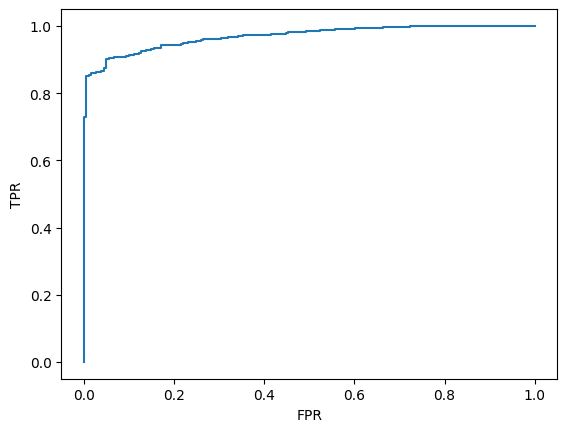

In [83]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr); plt.xlabel('FPR'); plt.ylabel('TPR')


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.94      0.65       181
           1       0.99      0.90      0.95      1819

    accuracy                           0.91      2000
   macro avg       0.74      0.92      0.80      2000
weighted avg       0.95      0.91      0.92      2000

